#### Generating additional data for unbalanced classes by jittering the original image

In many deep learning applications, we often come across data sets where one type of data may be seen more than other types. For example, in a traffic sign identification task, there may be more stop signs than speed limit signs. Therefore, in these cases, we need to make sure that the trained model is not biased towards the class that has more data. As an example, consider a data set where there are 5 speed limit signs and 20 stop signs. If the model predicts all signs to be stop signs, its accuracy is 80%. Further, f1-score of such a model is 0.88. Therefore, the model has high tendency to be biased toward the 'stop' sign class. In such cases, additional data can be generated to make the size of data sets similar. 

One way to collect more data is to take the picture of the same sign from different angles. This can be done easily in openCV by applying affine transformations, such as rotations, translations and shearing. Affine transformations are transformations where the parallel lines before transformation remain parallel after transformation. 

Below I present a function that can be used to generate jittered images. The function takes in the original image, range of angle rotation, range of tranlation and range of shearing and returns a jittered image. As the function chooses true tranformation values from a uniform distribution that is specified by these ranges, it 

Note, the same techniques can be applied using image generator in Keras. However, the transform_image() function provided here will help you play with the parameters and see whats happening under the hood. 

In [94]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
from skimage import io # necesario para leer imágenes
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg


In [89]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,0] = image1[:,:,0]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    img = augment_brightness_camera_images(img)
    
    return img

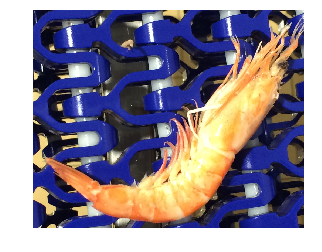

In [90]:
image = mpimg.imread('Prawn.jpg')
plt.imshow(image);
plt.axis('off');

<class 'numpy.ndarray'>


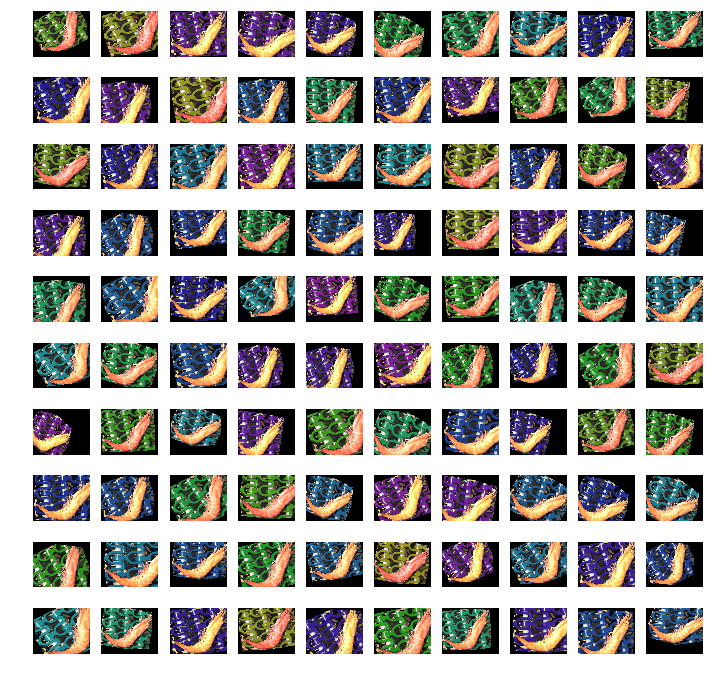

In [91]:
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
print(type(image))

imgs =[]

for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image,60,5,5)
    imgs.append(img)
    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

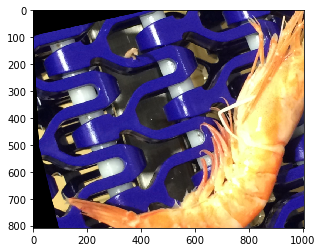

In [102]:
#.io.imsave  guardarlo
plt.imshow(imgs[10])
string.i=(2+".jpg")
io.imsave(i+".jpg", imgs[10])